## Import Dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('US_Accidents_Dec21_updated.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [4]:
dff = df.copy()

In [5]:
#drop number, street, country, zipcode, airport code, side, street, description, ID, County, State, Timezone
dff.drop(['Number', 'Street', 'Country', 'Zipcode', 'Airport_Code', 'Side', 'Street', 'Description', 'ID'], axis=1, inplace=True)

In [7]:
dff.drop(['County', 'State'], axis=1, inplace=True)

In [9]:
dff.drop(['Timezone'], axis=1, inplace=True)

In [10]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 36 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   End_Time               object 
 3   Start_Lat              float64
 4   Start_Lng              float64
 5   End_Lat                float64
 6   End_Lng                float64
 7   Distance(mi)           float64
 8   City                   object 
 9   Weather_Timestamp      object 
 10  Temperature(F)         float64
 11  Wind_Chill(F)          float64
 12  Humidity(%)            float64
 13  Pressure(in)           float64
 14  Visibility(mi)         float64
 15  Wind_Direction         object 
 16  Wind_Speed(mph)        float64
 17  Precipitation(in)      float64
 18  Weather_Condition      object 
 19  Amenity                bool   
 20  Bump                   bool   
 21  Crossing               bool   
 22  Give_Way          

In [11]:
dff.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [12]:
dff.isnull().sum()

Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
City                        137
Weather_Timestamp         50736
Temperature(F)            69274
Wind_Chill(F)            469643
Humidity(%)               73092
Pressure(in)              59200
Visibility(mi)            70546
Wind_Direction            73775
Wind_Speed(mph)          157944
Precipitation(in)        549458
Weather_Condition         70636
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Calming               0
Traffic_Signal                0
Turning_

In [15]:
#drop rows with CITY null
dff.dropna(subset=['City'], inplace=True)

In [17]:
dff.isnull().sum()

Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
City                          0
Weather_Timestamp         50735
Temperature(F)            69271
Wind_Chill(F)            469614
Humidity(%)               73089
Pressure(in)              59196
Visibility(mi)            70541
Wind_Direction            73773
Wind_Speed(mph)          157933
Precipitation(in)        549436
Weather_Condition         70630
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Calming               0
Traffic_Signal                0
Turning_

### Data Visualization

In [18]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [19]:
#CITY
#how many cities
dff.City.nunique()

11681

In [21]:
#accident number in various cities
cities_by_accident = dff.City.value_counts()
cities_by_accident[:30]

Miami             106966
Los Angeles        68956
Orlando            54691
Dallas             41979
Houston            39448
Charlotte          33152
Sacramento         32559
San Diego          26627
Raleigh            22840
Minneapolis        22768
Portland           20944
Nashville          20267
Austin             18301
Baton Rouge        18182
Phoenix            17143
Saint Paul         16869
New Orleans        16251
Atlanta            15622
Jacksonville       14967
Richmond           14349
Tucson             13799
San Jose           13377
Riverside          13310
Kansas City        13298
Bakersfield        12044
San Bernardino     11249
Chicago            11188
Tampa              10984
Salt Lake City     10709
Ontario            10538
Name: City, dtype: int64

In [26]:
cities_by_accident[-2000:]

Tonalea                         3
Tuttle                          3
Holdingford                     3
Braman                          3
Coal Center                     3
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 2000, dtype: int64

<AxesSubplot:>

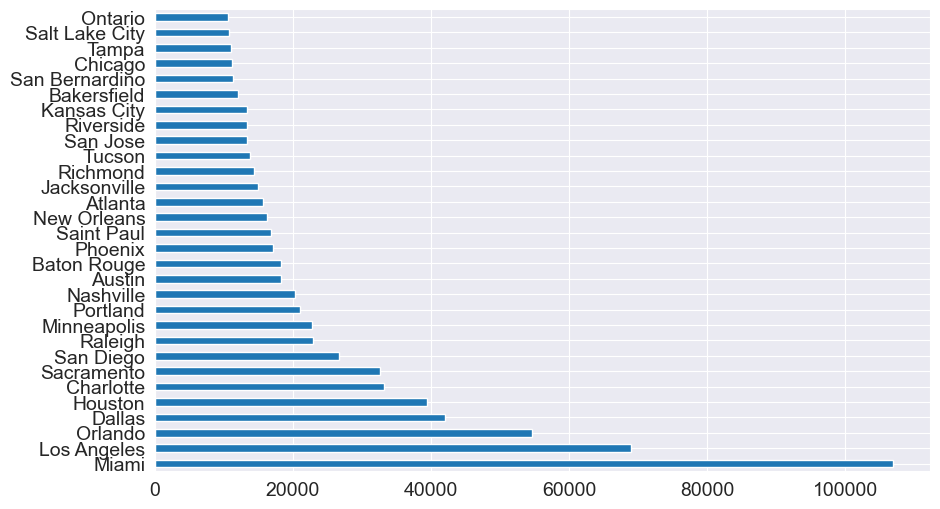

In [31]:
#plot first 30 in a bar graph
cities_by_accident[:30].plot(kind='barh')

In [37]:
#Distance vs Start latitude vs Severity
distance = df['Distance(mi)']
severity = df['Severity']
start = df['Start_Lat']

px.histogram(df,
          x=distance[:50],
          y=start[:500],
          color=severity[:50],
          title='Distance vs Severity'
          )

In [38]:
#Temperature & pressure

temperature = df['Temperature(F)']
pressure = df['Pressure(in)']
px.histogram(df, 
           title='Temperature vs Severity',
           x = temperature[:20000],
           #y = pressure[:10000],
           color = severity[:20000])

In [42]:
#Visibilty
visibility = df['Visibility(mi)']
start = df['Start_Lat']
fig = px.histogram(df,
                x=visibility[:200],
                #y=start[:10000],
                color=severity[:200],
                title='Visibility vs Start_Lat')
fig.show()

## Training, Validation and Test Sets

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
train_val, test_dff = train_test_split(dff, test_size=0.2, random_state=100)
train_dff, val_dff = train_test_split(train_val, test_size=0.3, random_state=100)

In [45]:
print('train_dff.shape: ', train_dff.shape)
print('val_dff.shape: ', val_dff.shape)
print('test_dff.shape: ', test_dff.shape)

train_dff.shape:  (1593314, 36)
val_dff.shape:  (682850, 36)
test_dff.shape:  (569041, 36)


In [46]:
train_dff

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,Weather_Timestamp,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2734627,3,2017-11-28 19:55:52,2017-11-29 01:55:52,42.496390,-83.527920,42.499883,-83.544466,0.877,Wixom,2017-11-28 19:53:00,...,False,False,False,False,False,False,Night,Night,Night,Night
2637259,2,2018-07-25 16:42:47,2018-07-25 17:12:25,25.903540,-80.210270,25.895060,-80.209740,0.587,Miami,2018-07-25 16:53:00,...,False,False,False,False,False,False,Day,Day,Day,Day
429525,2,2021-10-22 07:22:30.000000000,2021-10-22 09:51:31.000000000,38.892191,-77.425868,38.893628,-77.431513,0.319,Chantilly,2021-10-22 06:52:00,...,False,False,False,False,False,False,Night,Day,Day,Day
2621345,2,2018-08-14 08:12:16,2018-08-14 12:12:16,45.666760,-118.818240,45.665809,-118.815316,0.156,Pendleton,2018-08-14 07:53:00,...,False,False,False,False,False,False,Day,Day,Day,Day
2326081,2,2020-02-03 12:34:00,2020-02-03 16:06:49,37.335037,-118.516601,37.335037,-118.516601,0.000,Bishop,2020-02-03 12:56:00,...,False,False,True,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556775,2,2018-12-12 18:10:50,2018-12-12 18:40:24,33.910990,-84.214880,33.914780,-84.202360,0.764,Norcross,2018-12-12 17:53:00,...,False,False,False,False,False,False,Night,Night,Day,Day
2306836,2,2020-01-18 18:13:00,2020-01-18 21:27:11,47.050820,-94.349200,47.050820,-94.349200,0.000,Walker,2020-01-18 18:12:00,...,False,False,False,False,False,False,Night,Night,Night,Day
6379,3,2016-04-09 01:28:09,2016-04-09 07:28:09,34.301300,-117.459850,34.296520,-117.455940,0.399,San Bernardino,2016-04-09 06:50:00,...,False,False,False,False,False,False,Night,Night,Night,Night
1260287,2,2021-04-06 03:47:30,2021-04-07 18:58:44,28.450025,-81.472648,28.449397,-81.477944,0.325,Orlando,2021-04-06 03:53:00,...,False,False,False,False,False,False,Night,Night,Night,Night


In [51]:
train_dff['Traffic_Signal'].value_counts()

False    1444448
True      148866
Name: Traffic_Signal, dtype: int64

## Inputs and Targets

In [52]:
input_col = list(train_dff.columns)[1:]
input_col

['Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'City',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [56]:
target_col = 'Severity'
target_col

'Severity'

In [57]:
#train inputs and targets
train_inputs = train_dff[input_col].copy()
target_input = train_dff[target_col].copy()

#validation inputs and targets
val_inputs = val_dff[input_col].copy()
val_targets =val_dff[target_col].copy()

#test inputs and targets
test_inputs = test_dff[input_col].copy()
test_targets =test_dff[target_col].copy()

In [58]:
train_inputs

,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,Weather_Timestamp,Temperature(F),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2734627,2017-11-28 19:55:52,2017-11-29 01:55:52,42.496390,-83.527920,42.499883,-83.544466,0.877,Wixom,2017-11-28 19:53:00,59.0,...,False,False,False,False,False,False,Night,Night,Night,Night
2637259,2018-07-25 16:42:47,2018-07-25 17:12:25,25.903540,-80.210270,25.895060,-80.209740,0.587,Miami,2018-07-25 16:53:00,80.1,...,False,False,False,False,False,False,Day,Day,Day,Day
429525,2021-10-22 07:22:30.000000000,2021-10-22 09:51:31.000000000,38.892191,-77.425868,38.893628,-77.431513,0.319,Chantilly,2021-10-22 06:52:00,59.0,...,False,False,False,False,False,False,Night,Day,Day,Day
2621345,2018-08-14 08:12:16,2018-08-14 12:12:16,45.666760,-118.818240,45.665809,-118.815316,0.156,Pendleton,2018-08-14 07:53:00,62.1,...,False,False,False,False,False,False,Day,Day,Day,Day
2326081,2020-02-03 12:34:00,2020-02-03 16:06:49,37.335037,-118.516601,37.335037,-118.516601,0.000,Bishop,2020-02-03 12:56:00,39.0,...,False,False,True,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556775,2018-12-12 18:10:50,2018-12-12 18:40:24,33.910990,-84.214880,33.914780,-84.202360,0.764,Norcross,2018-12-12 17:53:00,44.1,...,False,False,False,False,False,False,Night,Night,Day,Day
2306836,2020-01-18 18:13:00,2020-01-18 21:27:11,47.050820,-94.349200,47.050820,-94.349200,0.000,Walker,2020-01-18 18:12:00,1.0,...,False,False,False,False,False,False,Night,Night,Night,Day
6379,2016-04-09 01:28:09,2016-04-09 07:28:09,34.301300,-117.459850,34.296520,-117.455940,0.399,San Bernardino,2016-04-09 06:50:00,55.4,...,False,False,False,False,False,False,Night,Night,Night,Night
1260287,2021-04-06 03:47:30,2021-04-07 18:58:44,28.450025,-81.472648,28.449397,-81.477944,0.325,Orlando,2021-04-06 03:53:00,58.0,...,False,False,False,False,False,False,Night,Night,Night,Night


In [60]:
#numerical and categorical columns

num_cols = train_inputs.select_dtypes(np.number).columns.tolist()
cat_cols = train_inputs.select_dtypes('object').columns.tolist()

In [61]:
num_cols

['Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

In [62]:
cat_cols

['Start_Time',
 'End_Time',
 'City',
 'Weather_Timestamp',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [63]:
train_inputs[num_cols].describe()

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.593314e+06,1.593314e+06,1.593314e+06,1.593314e+06,1.593314e+06,1.554513e+06,1.330264e+06,1.552405e+06,1.560237e+06,1.553935e+06,1.504802e+06,1.286011e+06
mean,3.624384e+01,-9.709417e+01,3.624395e+01,-9.709391e+01,7.027085e-01,6.179598e+01,5.966214e+01,6.436727e+01,2.947248e+01,9.099789e+00,7.396233e+00,7.073462e-03
std,5.364284e+00,1.831302e+01,5.364371e+00,1.831284e+01,1.558805e+00,1.862159e+01,2.116289e+01,2.287295e+01,1.046141e+00,2.725414e+00,5.577171e+00,9.566681e-02
min,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.344069e+01,-1.180288e+02,3.344144e+01,-1.180287e+02,5.200000e-02,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,3.610099e+01,-9.239017e+01,3.610082e+01,-9.238947e+01,2.430000e-01,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,4.016144e+01,-8.037223e+01,4.016193e+01,-8.037246e+01,7.640000e-01,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.900027e+01,-6.711317e+01,4.900076e+01,-6.710924e+01,1.551860e+02,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [64]:
train_inputs[cat_cols].nunique()

Start_Time               1241882
End_Time                 1413772
City                       10964
Weather_Timestamp         370234
Wind_Direction                24
Weather_Condition            112
Sunrise_Sunset                 2
Civil_Twilight                 2
Nautical_Twilight              2
Astronomical_Twilight          2
dtype: int64